# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.

**You must use quantitative visualizations (boxplots or histograms) when comparing quantitative features.  DO NOT categorize quantitative features.**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("loan_data.csv")
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71,male,Associate,46817.176426,3,RENT,11567.737650,MEDICAL,10.351469,0.247083,5,806.869094,No,0
1,34,male,High School,79093.494008,17,OWN,9519.674498,MEDICAL,11.168902,0.120360,1,604.330171,No,0
2,80,male,Associate,67819.614431,20,OWN,16226.604002,PERSONAL,12.293112,0.239261,11,685.933579,No,0
3,40,female,Associate,49599.861220,0,RENT,15641.221708,VENTURE,10.327926,0.315348,14,629.190150,No,0
4,43,male,Doctorate,99833.900180,8,OWN,12727.942517,EDUCATION,9.338069,0.127491,16,638.298168,No,1


In [7]:
df["loan_status"].value_counts()


loan_status
0    40107
1     4893
Name: count, dtype: int64

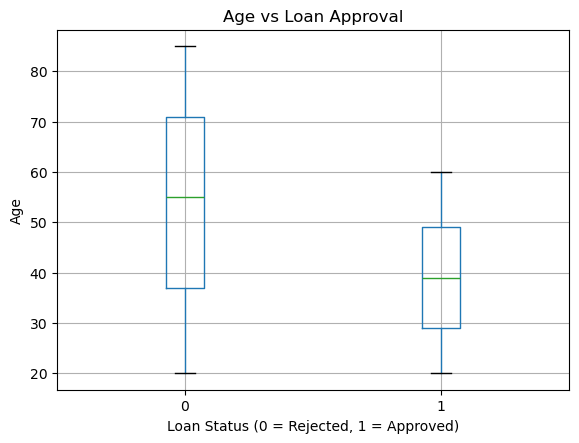

In [8]:
df.boxplot(column="person_age", by="loan_status")

plt.title("Age vs Loan Approval")
plt.suptitle("")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Age")
plt.show()


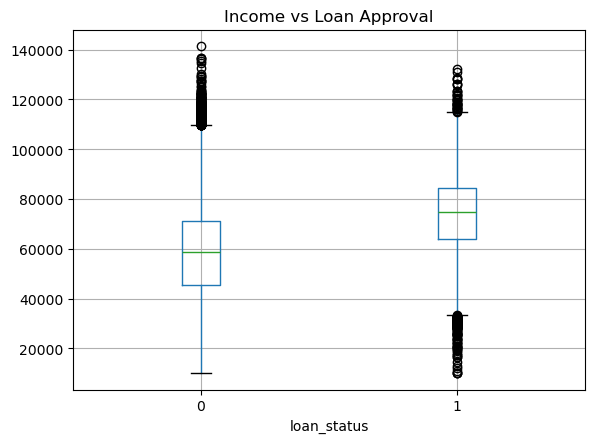

In [9]:
df.boxplot(column="person_income", by="loan_status")

plt.title("Income vs Loan Approval")
plt.suptitle("")
plt.show()


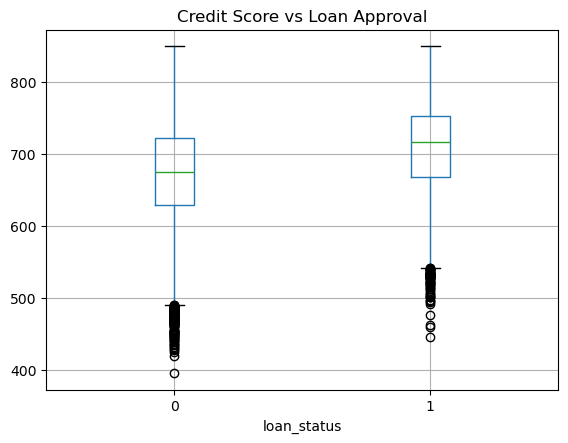

In [10]:
df.boxplot(column="credit_score", by="loan_status")

plt.title("Credit Score vs Loan Approval")
plt.suptitle("")
plt.show()


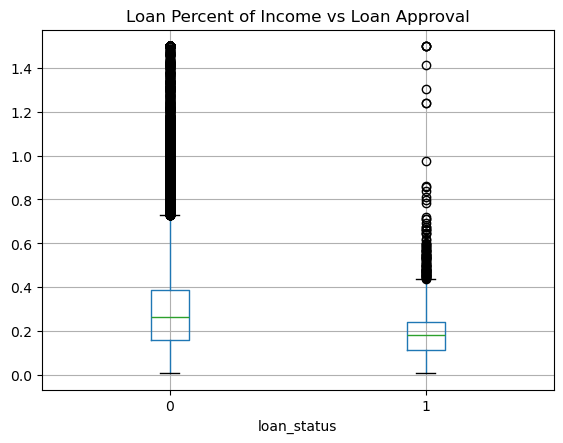

In [11]:
df.boxplot(column="loan_percent_income", by="loan_status")

plt.title("Loan Percent of Income vs Loan Approval")
plt.suptitle("")
plt.show()


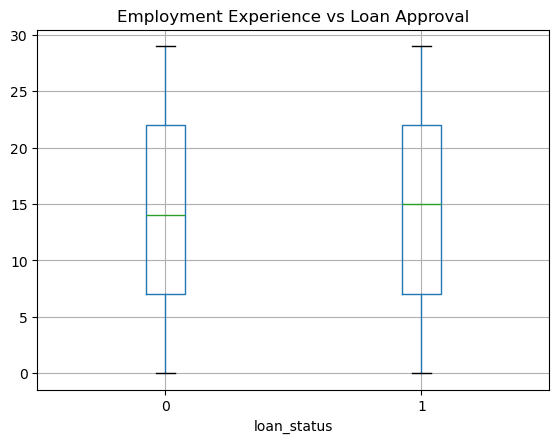

In [12]:
df.boxplot(column="person_emp_exp", by="loan_status")

plt.title("Employment Experience vs Loan Approval")
plt.suptitle("")
plt.show()


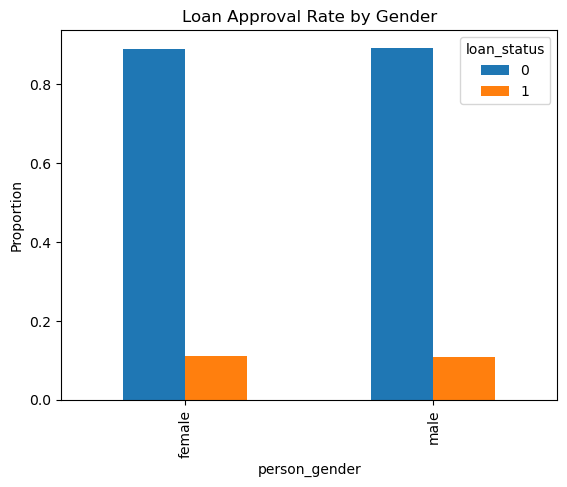

In [13]:
pd.crosstab(df["person_gender"], df["loan_status"], normalize="index").plot(kind="bar")

plt.title("Loan Approval Rate by Gender")
plt.ylabel("Proportion")
plt.show()


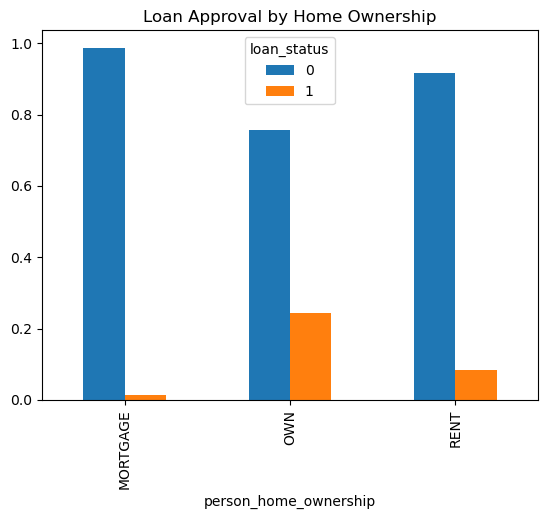

In [14]:
pd.crosstab(df["person_home_ownership"], df["loan_status"], normalize="index").plot(kind="bar")

plt.title("Loan Approval by Home Ownership")
plt.show()


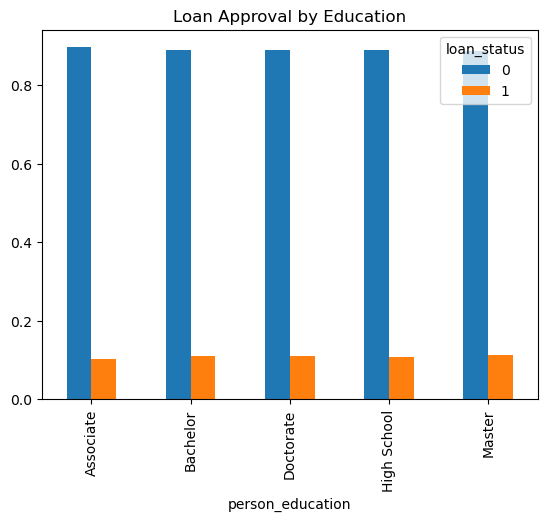

In [15]:
pd.crosstab(df["person_education"], df["loan_status"], normalize="index").plot(kind="bar")

plt.title("Loan Approval by Education")
plt.show()


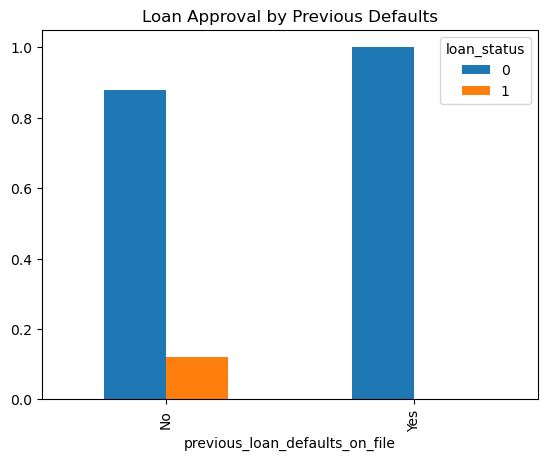

In [16]:
pd.crosstab(df["previous_loan_defaults_on_file"], df["loan_status"], normalize="index").plot(kind="bar")

plt.title("Loan Approval by Previous Defaults")
plt.show()


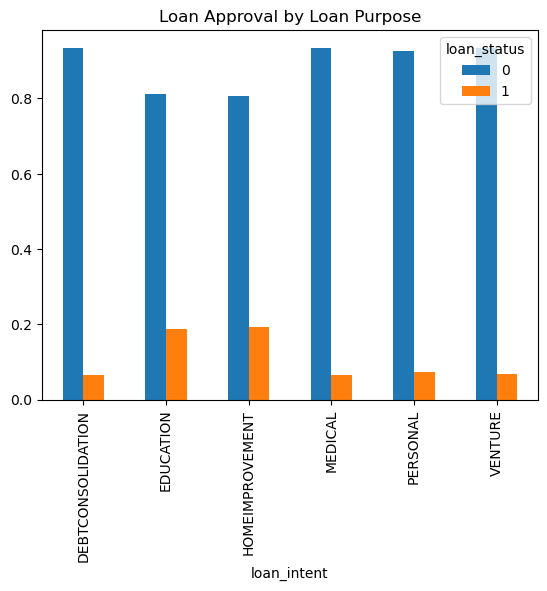

In [17]:
pd.crosstab(df["loan_intent"], df["loan_status"], normalize="index").plot(kind="bar")

plt.title("Loan Approval by Loan Purpose")
plt.show()


## Interpretation

### Strong Predictors of Loan Approval

**1. Credit Score**
The boxplot shows a clear upward shift in credit scores for approved loans (loan_status = 1) compared to rejected loans (loan_status = 0).  
Approved applicants have noticeably higher median credit scores and less overlap in the upper ranges.  
This appears to be one of the strongest drivers of approval.

**2. Income**
Approved applicants show a higher median income than rejected applicants.  
Although there is overlap, the central tendency for approved loans is clearly higher.  
Income appears to meaningfully influence approval decisions.

**3. Loan Percent of Income**
Rejected applicants have higher loan_percent_income values.  
Approved applicants generally request loans that represent a smaller percentage of their income.  
This suggests debt burden ratio is an important decision factor.

**4. Home Ownership**
Applicants who own their homes have a noticeably higher approval rate compared to renters or those with mortgages.  
This suggests housing stability may influence approval.

**5. Previous Loan Defaults**
Applicants with previous defaults show almost no approvals.  
This is a very strong indicator that prior defaults heavily impact loan decisions.

---

### Moderate or Weak Predictors

**Employment Experience**
The boxplots for employment experience show significant overlap between approved and rejected groups.  
While approved applicants may have slightly higher medians, the separation is minimal.

**Education**
Approval rates across education levels appear very similar.  
There is no strong visual difference suggesting education drives approval.

**Loan Intent**
Some loan purposes (e.g., education, home improvement) appear to have slightly higher approval rates, but differences are not extreme.

---

### Age Analysis

Approved applicants appear somewhat younger than rejected applicants based on the median age difference.  
Rejected applicants show a wider age distribution and a higher median age.  

However, there is substantial overlap between the two groups.  
Age does not appear to be as strong a predictor as credit score, income, or prior defaults.

---

### Gender Analysis

The approval rates for males and females appear nearly identical.  
There is no meaningful visual difference in proportions between genders.  

This suggests gender does not appear to strongly influence loan approval.

---

### Legal Risk Assessment

There is limited visual evidence that age or gender are primary drivers of the model's decisions.  
The strongest predictors appear to be financial risk indicators:

- Credit score  
- Income  
- Debt-to-income ratio  
- Previous loan defaults  
- Home ownership  

Because approval decisions appear to be driven primarily by financial risk factors rather than protected characteristics, there is limited evidence of discriminatory behavior based on the visual analysis alone.

However, the institution should still conduct formal statistical fairness testing to confirm compliance.
